In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('../data/diamond.csv')
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [5]:
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


In [6]:
df.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

Handle Categorical variables

In [8]:
print(df.columns)

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')


In [31]:
# Encode cut, color, clarity using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Cut'] = le.fit_transform(df['Cut'])
df['Color'] = le.fit_transform(df['Color'])
df['Clarity'] = le.fit_transform(df['Clarity'])
df['Polish'] = le.fit_transform(df['Polish'])
df['Symmetry'] = le.fit_transform(df['Symmetry'])
df['Report'] = le.fit_transform(df['Report'])

Define features & Taregt

In [23]:
X = df.drop('Price', axis=1)
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.dtypes)


Carat Weight    float64
Cut               int64
Color             int64
Clarity           int64
Polish            int64
Symmetry          int64
Report            int64
color             int64
clarity           int64
dtype: object


Training the model

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

MSE: 1686139.1891768703
R² Score: 0.9841780490302793


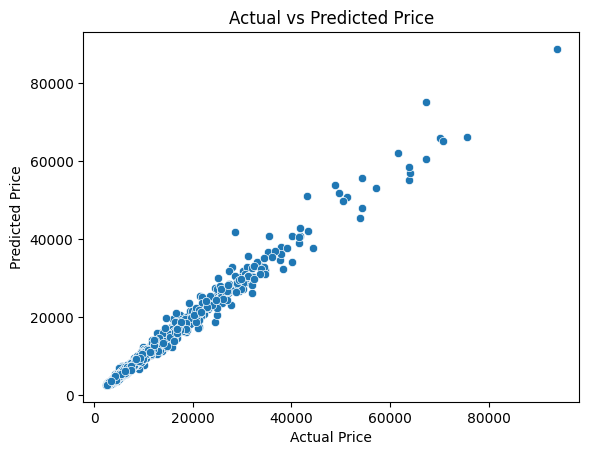

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [28]:
import pickle

with open('../models/diamond_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)